# Regresi Linier
Regresi linier adalah salah satu metode statistik paling dasar dan banyak digunakan dalam analisis data dan machine learning. Tujuan utama dari regresi linier adalah untuk memodelkan hubungan antara satu atau lebih variabel independen (fitur) dengan satu variabel dependen (target) yang bersifat kontinu. Dengan mengasumsikan adanya hubungan linier antara variabel-variabel tersebut, regresi linier menghasilkan sebuah persamaan garis lurus yang digunakan untuk memprediksi nilai target berdasarkan nilai fitur. Selain memberikan prediksi, regresi linier juga membantu dalam memahami kekuatan, arah, dan signifikansi hubungan antar variabel, menjadikannya alat yang berguna baik untuk prediksi maupun interpretasi.

### Importing Libraries

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Regresi Linier Sederhana
#### *Regresi Linier Sederhana* : **y = b0 + b1 * x1**
Regresi linier sederhana adalah bentuk paling dasar dari regresi linier yang hanya melibatkan satu variabel independen dan satu variabel dependen. Model ini digunakan untuk menganalisis dan memprediksi hubungan linier antara dua variabel, dengan asumsi bahwa perubahan pada variabel independen secara langsung memengaruhi variabel dependen. Persamaan yang dihasilkan berbentuk garis lurus dalam dua dimensi, dan ditentukan oleh kemiringan (koefisien regresi) dan intersep (titik potong). Regresi linier sederhana sangat berguna untuk mengilustrasikan konsep dasar regresi, serta untuk kasus-kasus prediksi sederhana yang hanya melibatkan satu faktor utama.

### Membuat dataset

In [75]:
df_simple = pd.read_csv('C:/Users/LENOVO/Python/advertising.csv',usecols=['TV','Sales'])

In [76]:
df_simple.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


### Mengetahui dimensi data

In [77]:
df_simple.shape

(200, 2)

### Mengetahui statistik deskriptif data

In [78]:
df_simple.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


### Mengetahui banyak data hilang

In [79]:
df_simple.isnull().sum()

TV       0
Sales    0
dtype: int64

## Pemilihan fitur dan target

In [80]:
X = df_simple[["TV"]]
y = df_simple["Sales"]
print(X)
print(y)

        TV
0    230.1
1     44.5
2     17.2
3    151.5
4    180.8
..     ...
195   38.2
196   94.2
197  177.0
198  283.6
199  232.1

[200 rows x 1 columns]
0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64


### Train Test Split

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Membangun Model

In [82]:
lr = LinearRegression()

In [83]:
lr.fit(X_train,y_train)

LinearRegression()

### Melakukan prediksi dengan data test

In [84]:
y_pred = lr.predict(X_test)

### Visualisasi fitur dan target aktual vs prediksi

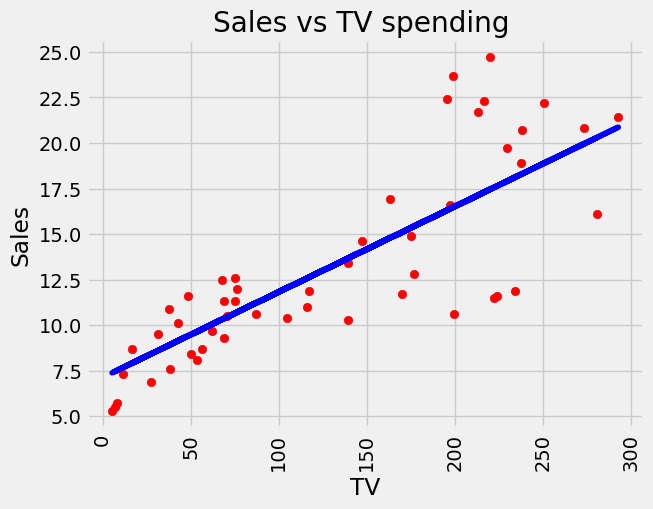

In [85]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, lr.predict(X_test), color = "blue")
plt.title("Sales vs TV spending ")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.xticks(rotation=90)
plt.show()

* Garis biru secara umum mengikuti pola sebaran titik merah, yang menunjukkan bahwa model regresi linier sederhana berhasil menangkap tren hubungan positif antara TV spending dan sales.
* Titik-titik merah tersebar cukup dekat ke garis regresi di sebagian besar rentang nilai TV spending, menandakan model memberikan prediksi yang relatif akurat.
* Namun, terdapat beberapa titik yang jauh dari garis (outlier), khususnya di nilai TV spending yang tinggi, yang menunjukkan prediksi model tidak selalu tepat pada area ini yang bisa disebabkan oleh faktor lain yang tidak dimasukkan ke model (misalnya iklan di media lain, atau faktor eksternal pasar).

### R Squared Score

In [86]:
print("R2 Score adalah :",round(r2_score(y_test,y_pred),3)*100,"%")

R2 Score adalah : 66.10000000000001 %


Artinya, model regresi linier sederhana ini mampu menjelaskan 66,1% variasi penjualan (Sales) berdasarkan pengeluaran iklan TV (TV spending). Ini mengindikasikan model menangkap sebagian besar tren, namun masih ada 33,9% variasi yang dijelaskan oleh faktor lain di luar model.

#### Mengetahui intercept dan koefisien

In [87]:
lr.intercept_

np.float64(7.1317845066853245)

Nilai ini menunjukkan prediksi nilai Sales ketika TV spending adalah 0. Artinya, jika perusahaan tidak mengeluarkan biaya iklan di TV sama sekali, model memprediksi penjualan rata-rata sekitar 7,13 unit.

In [88]:
lr.coef_[0]

np.float64(0.04689445573282432)

Nilai ini mengartikan bahwa setiap tambahan 1 unit pengeluaran iklan di TV akan meningkatkan penjualan sebesar rata-rata 0.04689 unit.

- Mari kita cari tahu angka penjualan jika kita menghabiskan **300 $** untuk iklan TV

**dengan menggunakan Regresi Linier Sederhana**

In [89]:
print("Prediksi Sales :",round(lr.predict([[300]])[0],2))

Prediksi Sales : 21.2


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


**dengan menggunakan intercept dan koefisien**

In [90]:
y = lr.intercept_ + lr.coef_* 300

In [91]:
print("Prediksi Sales :",round(y[0],2))

Prediksi Sales : 21.2


## Regresi Linier Berganda
#### *Rumus Regresi Linier Berganda* : **y = b0 + b1 * x1  + b2 * x2  + b3 * x3 ... + bn * xn**
Regresi linier berganda merupakan perluasan dari regresi linier sederhana, di mana model melibatkan lebih dari satu variabel independen untuk memprediksi satu variabel dependen. Model ini memungkinkan analisis hubungan yang lebih kompleks dan realistis, karena mempertimbangkan berbagai faktor yang mungkin saling berinteraksi dalam memengaruhi target. Persamaan regresi linier berganda berbentuk hiperbidang di ruang multidimensi, dengan masing-masing koefisien mewakili pengaruh relatif dari tiap variabel terhadap target, ketika variabel lain dianggap konstan. Model ini banyak digunakan dalam berbagai bidang, seperti ekonomi, kesehatan, dan ilmu sosial, untuk memahami faktor-faktor yang memengaruhi suatu fenomena secara simultan.

In [92]:
df_multiple = pd.read_csv('C:/Users/LENOVO/Python/advertising.csv')

In [93]:
df_multiple.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### Mengetahui nilai hilang

In [94]:
df_multiple.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

### Menghapus nilai hilang

In [95]:
df_multiple = df_multiple.drop(columns=['Unnamed: 0'])
df_multiple.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


### Mengetahui statistik deskriptif data

In [96]:
df_multiple.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### Memilih fitur dan target

In [97]:
X = df_multiple[["TV","Radio","Newspaper"]]
y = df_multiple["Sales"]

### Split train test 

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Membangun model

In [99]:
lr = LinearRegression()

In [100]:
lr.fit(X_train,y_train)

LinearRegression()

### Melakukan prediksi

In [101]:
y_pred = lr.predict(X_test)

### Evaluasi

In [102]:
r_squared = r2_score(y_test,y_pred)
r_squared

0.8935163320163659

R² = 0.8935 → model mampu menjelaskan 89,35% variasi nilai target (Sales) dengan menggunakan ketiga variabel independen. Ini jauh lebih baik dibanding regresi linier sederhana sebelumnya yang hanya 66%.

In [103]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

In [104]:
print('Adjusted R Squared: %',round(adjusted_r_squared*100,2), '\nR Squared: %',round(r_squared*100,2))

Adjusted R Squared: % 89.19 
R Squared: % 89.35


Adjusted R² = 0.8919 → Adjusted R² memperhitungkan jumlah fitur dan ukuran sampel. Nilai ini hanya sedikit di bawah R², menandakan model tidak mengalami overfitting signifikan walau menambahkan variabel, sehingga fitur tambahan memang relevan.

In [105]:
print("Intercept: ",lr.intercept_,"\nKoefisien: ", lr.coef_)

Intercept:  2.7783034602452776 
Koefisien:  [0.04543356 0.19145654 0.00256809]


In [106]:
lr.coef_

array([0.04543356, 0.19145654, 0.00256809])

- Koefisien TV : **0.04543356**
- Koefisien Radio : **0.19145654**
- Koefisien Newspaper : **0.00256809**

* Intercept (b₀ = 2.7783):\
    Jika semua variabel independen bernilai 0, model memprediksi sales sebesar 2.778 unit. Ini baseline prediksi penjualan tanpa adanya pengeluaran pada ketiga variabel.
* Koefisien b₁ = 0.04543:\
    Untuk setiap kenaikan 1 unit pada variabel pertama (x₁, misalnya TV), penjualan diperkirakan naik sebesar 0.04543 unit, dengan asumsi variabel lain konstan.
* Koefisien b₂ = 0.19146:\
    Setiap kenaikan 1 unit pada variabel kedua (x₂, misalnya Radio) menaikkan penjualan rata-rata 0.19146 unit, dengan variabel lain konstan. Koefisien ini lebih besar dari b₁, menandakan pengaruh variabel kedua terhadap penjualan relatif lebih besar.
* Koefisien b₃ = 0.00257:\
    Setiap kenaikan 1 unit pada variabel ketiga (x₃, misalnya Newspaper) menaikkan penjualan hanya 0.00257 unit. Ini menunjukkan pengaruh variabel ketiga sangat kecil terhadap penjualan, mungkin tidak signifikan secara praktis.

#### Coba kita cari tahu berapa unit penjualan yang bsa kita peroleh dari pengeluaran dibawah ini
- 200 Dollars untuk Periklanan TV
- 50  Dollars untuk Radio
- 20  Dollars untuk Newspaper

**Menggunakan Linear Regression**

In [107]:
round(lr.predict([[200,50,20]])[0],2)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(21.49)

**Menggunakan coefficient dan intercept LR**

In [108]:
y = lr.intercept_ + lr.coef_[0] * 200 + lr.coef_[1] * 50 + lr.coef_[2] * 20

In [109]:
round(y,2)

np.float64(21.49)

# Thank you ###